# MNIST Digits Recognition
This notebook is a simple example of how to use the SimpleNeuralNetwork of this repository to recognize handwritten digits from the MNIST dataset. The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits from 0 to 9. The dataset is divided into a training set of 60,000 images and a test set of 10,000 images. The goal is to train a neural network to recognize the digits from the training set and then test it on the test set.

## Import Required Libraries

In [1]:
import os

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## Define Constants

In [2]:
TRAINING_SIZE = 60000
SPLIT = 0.8
NUM_CLASSES = 10
EPOCHS = 10
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = IMG_ROWS * IMG_COLS

## Prepare and Preprocess MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], INPUT_SHAPE)
x_test = x_test.reshape(x_test.shape[0], INPUT_SHAPE)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

shuffle_index = np.random.permutation(TRAINING_SIZE)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

index_to_split = int(TRAINING_SIZE * SPLIT)
x_train, x_val = x_train[:index_to_split].T, x_train[index_to_split:].T
y_train, y_val = y_train[:index_to_split].T, y_train[index_to_split:].T
x_test = x_test.T

# One-hot encode the labels and transpose
y_train = np.eye(NUM_CLASSES)[y_train].T
y_val = np.eye(NUM_CLASSES)[y_val].T
y_test = np.eye(NUM_CLASSES)[y_test].T

print('x_train:', x_train.shape)
print('x_val:', x_val.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_val.shape)
print('y_test:', y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train: (784, 48000)
x_val: (784, 12000)
x_test: (784, 10000)
y_train: (10, 48000)
y_val: (10, 12000)
y_test: (10, 10000)


## Train First Neural Network with Dense Layers

In [4]:
# Append the path to the parent directory to import the modules
import os
import sys

sys.path.append(os.path.join(os.path.curdir, '..'))


In [6]:
import net_modules.models as models
import net_modules.layers as layers
import net_modules.losses as losses
import net_modules.optimizers as optimizers

def reload_net():
  import importlib
  importlib.reload(layers)
  importlib.reload(models)
  importlib.reload(losses)
  importlib.reload(optimizers)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(INPUT_SHAPE, 64))
model.add(layers.ELU())
model.add(layers.Dense(64, NUM_CLASSES))
model.add(layers.ELU())
model.add(layers.Softmax(cross_entropy_loss=True))

model.compile(loss=losses.CrossEntropy())

model.fit(x_train, y_train, epochs=100, learning_rate=0.1, batch_size=512, metrics=['accuracy'])

--------------------------------------------------
Epoch 1/100, Error: 0.0481, accuracy: 0.8740
--------------------------------------------------
Epoch 2/100, Error: 0.0385, accuracy: 0.8948
--------------------------------------------------
Epoch 3/100, Error: 0.0348, accuracy: 0.9026
--------------------------------------------------
Epoch 4/100, Error: 0.0330, accuracy: 0.9052
--------------------------------------------------
Epoch 5/100, Error: 0.0312, accuracy: 0.9114
--------------------------------------------------
Epoch 6/100, Error: 0.0302, accuracy: 0.9140
--------------------------------------------------
Epoch 7/100, Error: 0.0292, accuracy: 0.9156
--------------------------------------------------
Epoch 8/100, Error: 0.0283, accuracy: 0.9195
--------------------------------------------------
Epoch 9/100, Error: 0.0274, accuracy: 0.9218
--------------------------------------------------
Epoch 10/100, Error: 0.0267, accuracy: 0.9246
---------------------------------------

In [ ]:
model.evaluate(x_train, y_train, metrics=['accuracy']) # Note: Evaluate on training set here. Test accuracy was 0.95

loss (crossentropy): 0.0067, accuracy: 0.9818


{'loss': 0.00673227937136725, 'accuracy': 0.9817708333333334}

## Train Second Neural Network with Convolutional Layers

In [4]:
x_train_reshaped = x_train.reshape(28, 28, 1, -1)
x_val_reshaped = x_val.reshape(28, 28, 1, -1)
x_test_reshaped = x_test.reshape(28, 28, 1, -1)

print('x_train reshaped:', x_train_reshaped.shape)
print('x_val reshaped:', x_val_reshaped.shape)
print('x_test reshaped:', x_test_reshaped.shape)

x_train reshaped: (28, 28, 1, 48000)
x_val reshaped: (28, 28, 1, 12000)
x_test reshaped: (28, 28, 1, 10000)


In [ ]:
reload_net()
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(input_shape=(28, 28, 1),
                            kernel_size=(3,3),
                            number_filters=8,
                            initialization='lecun_uniform'))
model_cnn.add(layers.ReLU())
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(5408, 64))
model_cnn.add(layers.ReLU())
model_cnn.add(layers.Dense(64, NUM_CLASSES))
model_cnn.add(layers.ReLU())
model_cnn.add(layers.Softmax(cross_entropy_loss=True))
model_cnn.compile(loss=losses.CrossEntropy())
model_cnn.fit(x_train_reshaped, y_train, epochs=5, learning_rate=0.1, batch_size=512)

Epoch 1/5, Batch 1/93, Error: 4.21795139507046
Epoch 1/5, Batch 2/93, Error: 4.126688048764014
Epoch 1/5, Batch 3/93, Error: 4.047694272738991
Epoch 1/5, Batch 4/93, Error: 4.005149918712399
Epoch 1/5, Batch 5/93, Error: 3.991281284280523
Epoch 1/5, Batch 6/93, Error: 4.026851570192947
Epoch 1/5, Batch 7/93, Error: 3.8066544750758617
Epoch 1/5, Batch 8/93, Error: 3.5491648286153614
Epoch 1/5, Batch 9/93, Error: 3.4737659560953844
Epoch 1/5, Batch 10/93, Error: 3.4192135561350034
Epoch 1/5, Batch 11/93, Error: 3.3570595280379427
Epoch 1/5, Batch 12/93, Error: 3.3802742479853927
Epoch 1/5, Batch 13/93, Error: 3.243006780076452
Epoch 1/5, Batch 14/93, Error: 3.168080194592137
Epoch 1/5, Batch 15/93, Error: 2.9250313039713975
Epoch 1/5, Batch 16/93, Error: 2.528286280556152
Epoch 1/5, Batch 17/93, Error: 2.3860712972590883
Epoch 1/5, Batch 18/93, Error: 2.266542094482552
Epoch 1/5, Batch 19/93, Error: 2.102016180198955
Epoch 1/5, Batch 20/93, Error: 2.6625326803873044
Epoch 1/5, Batch 21/9

In [ ]:
model_cnn.evaluate(x_test_reshaped, y_test, metrics=['accuracy'])

loss (crossentropy): 5.3113, accuracy: 0.9572


{'loss': 5.311331553383126, 'accuracy': 0.9572}

## Train 3rd Neural Network with Conv and Dropout Layers

In [ ]:
reload_net()
model_3 = models.Sequential()
model_3.add(layers.Conv2D(input_shape=(28, 28, 1),
                           kernel_size=(3,3),
                           number_filters=16
                         ))
model_3.add(layers.ReLU())
model_3.add(layers.Dropout(0.1))
model_3.add(layers.Conv2D(input_shape=(26, 26, 1),
                           kernel_size=(3,3),
                           number_filters=32
                         ))
model_3.add(layers.ReLU())
model_3.add(layers.Dropout(0.1))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(18432, 64))
model_3.add(layers.ReLU())
model_3.add(layers.Dense(64, NUM_CLASSES))
model_3.add(layers.Softmax(cross_entropy_loss=True))
model_3.compile(loss=losses.CrossEntropy())
model_3.fit(x_train_reshaped, y_train, epochs=4, learning_rate=0.1, batch_size=512, verbose=2)

Epoch 1/4, Batch 1/93, Error: 0.24159878107943591
Epoch 1/4, Batch 2/93, Error: 0.2850736404458199
Epoch 1/4, Batch 3/93, Error: 0.22924992537504746
Epoch 1/4, Batch 4/93, Error: 0.22870676692409725
Epoch 1/4, Batch 5/93, Error: 0.22653276109069892
Epoch 1/4, Batch 6/93, Error: 0.2238560947027195
Epoch 1/4, Batch 7/93, Error: 0.22006960161369166
Epoch 1/4, Batch 8/93, Error: 0.21386610359330294
Epoch 1/4, Batch 9/93, Error: 0.2056725028204131
Epoch 1/4, Batch 10/93, Error: 0.19864906848636427
Epoch 1/4, Batch 11/93, Error: 0.1805182788559251
Epoch 1/4, Batch 12/93, Error: 0.1920764110274749
Epoch 1/4, Batch 13/93, Error: 0.22299359848777192
Epoch 1/4, Batch 14/93, Error: 0.2072977062322061
Epoch 1/4, Batch 15/93, Error: 0.18416558430883195
Epoch 1/4, Batch 16/93, Error: 0.1445859332240385
Epoch 1/4, Batch 17/93, Error: 0.1070734954391829
Epoch 1/4, Batch 18/93, Error: 0.17432911871189533
Epoch 1/4, Batch 19/93, Error: 0.21601651798374838
Epoch 1/4, Batch 20/93, Error: 0.209651301683183

In [ ]:
model_3.evaluate(x_test_reshaped, y_test, metrics=['accuracy'])

loss (crossentropy): 0.0078, accuracy: 0.9771


{'loss': 0.007832732080361176, 'accuracy': 0.9771}

In [ ]:
y_preds = model_3.predict(x_test_reshaped)

((10,), (10,))

## Train 4th Neural Network with BatchNormalization

In [ ]:
reload_net()
model_4 = models.Sequential()
model_4.add(layers.Conv2D(input_shape=(28, 28, 1),
                           kernel_size=(3,3),
                           number_filters=16
                         ))
model_4.add(layers.ReLU())
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.1))
model_4.add(layers.Conv2D(input_shape=(26, 26, 1),
                           kernel_size=(3,3),
                           number_filters=32
                         ))
model_4.add(layers.ReLU())
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.1))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(18432, 64))
model_4.add(layers.ReLU())
model_4.add(layers.Dense(64, NUM_CLASSES))
model_4.add(layers.Softmax(cross_entropy_loss=True))
model_4.compile(loss=losses.CrossEntropy())
model_4.fit(
    x_train_reshaped,
    y_train,
    epochs=2,
    learning_rate=0.1,
    batch_size=512,
    verbose=2,
    metrics=['accuracy'])

Epoch 1/2, Batch 1/93, Error: 0.31645913597972947
Epoch 1/2, Batch 2/93, Error: 0.1605441497592377
Epoch 1/2, Batch 3/93, Error: 0.10525334641468549
Epoch 1/2, Batch 4/93, Error: 0.08815757953799527
Epoch 1/2, Batch 5/93, Error: 0.06310666466438337
Epoch 1/2, Batch 6/93, Error: 0.06179194325387634
Epoch 1/2, Batch 7/93, Error: 0.04898524398076217
Epoch 1/2, Batch 8/93, Error: 0.0519438224484046
Epoch 1/2, Batch 9/93, Error: 0.05903914461082329
Epoch 1/2, Batch 10/93, Error: 0.043053123471457164
Epoch 1/2, Batch 11/93, Error: 0.03996099217921395
Epoch 1/2, Batch 12/93, Error: 0.05146906927104422
Epoch 1/2, Batch 13/93, Error: 0.044519577745712115
Epoch 1/2, Batch 14/93, Error: 0.044261478559118904
Epoch 1/2, Batch 15/93, Error: 0.03959931162632466
Epoch 1/2, Batch 16/93, Error: 0.037874813327459914
Epoch 1/2, Batch 17/93, Error: 0.04500144588974991
Epoch 1/2, Batch 18/93, Error: 0.03449593461414343
Epoch 1/2, Batch 19/93, Error: 0.037625033513562986
Epoch 1/2, Batch 20/93, Error: 0.0378

In [ ]:
model_4.evaluate(x_test_reshaped, y_test, metrics=['accuracy'])

loss (crossentropy): 0.0098, accuracy: 0.9684


{'loss': 0.009764237208077826, 'accuracy': 0.9684}

## Train 5th Neural Network with Momentum Optimizer

In [24]:
reload_net()
optimizer = optimizers.Momentum(momentum=0.9)
model_5 = models.Sequential()
model_5.add(layers.Dense(INPUT_SHAPE, 64, optimizer=optimizer))
model_5.add(layers.ELU())
model_5.add(layers.BatchNormalization(optimizer=optimizer))
model_5.add(layers.Dropout(0.2))
model_5.add(layers.Dense(64, 128, optimizer=optimizer))
model_5.add(layers.ELU())
model_5.add(layers.BatchNormalization(optimizer=optimizer))
model_5.add(layers.Dropout(0.2))
model_5.add(layers.Dense(128, NUM_CLASSES,  optimizer=optimizer))
model_5.add(layers.ELU())
model_5.add(layers.BatchNormalization(optimizer=optimizer))
model_5.add(layers.Softmax(cross_entropy_loss=True))
model_5.compile(loss=losses.CrossEntropy())

history_5 = model_5.fit(x_train, y_train, epochs=25, default_lr=0.01, batch_size=256, metrics=['accuracy'])

--------------------------------------------------
Epoch 1/25, Error: 0.0376, accuracy: 0.9064
--------------------------------------------------
Epoch 2/25, Error: 0.0273, accuracy: 0.9266
--------------------------------------------------
Epoch 3/25, Error: 0.0227, accuracy: 0.9383
--------------------------------------------------
Epoch 4/25, Error: 0.0198, accuracy: 0.9451
--------------------------------------------------
Epoch 5/25, Error: 0.0179, accuracy: 0.9502
--------------------------------------------------
Epoch 6/25, Error: 0.0166, accuracy: 0.9532
--------------------------------------------------
Epoch 7/25, Error: 0.0157, accuracy: 0.9555
--------------------------------------------------
Epoch 8/25, Error: 0.0151, accuracy: 0.9567
--------------------------------------------------
Epoch 9/25, Error: 0.0141, accuracy: 0.9593
--------------------------------------------------
Epoch 10/25, Error: 0.0136, accuracy: 0.9616
-------------------------------------------------

In [25]:
model_5.evaluate(x_test, y_test, metrics=['accuracy'])

loss (crossentropy): 0.0108, accuracy: 0.9681


{'loss': 0.010815136973892189, 'accuracy': 0.9681}

## Train 6th Neural Network with RMSProp Optimizer

In [26]:
reload_net()
optimizer = optimizers.RMSProp(rho=0.9)
model_6 = models.Sequential()
model_6.add(layers.Dense(INPUT_SHAPE, 64, optimizer=optimizer))
model_6.add(layers.ELU())
model_6.add(layers.BatchNormalization(optimizer=optimizer))
model_6.add(layers.Dropout(0.2))
model_6.add(layers.Dense(64, 128, optimizer=optimizer))
model_6.add(layers.ELU())
model_6.add(layers.BatchNormalization(optimizer=optimizer))
model_6.add(layers.Dropout(0.2))
model_6.add(layers.Dense(128, NUM_CLASSES,  optimizer=optimizer))
model_6.add(layers.ELU())
model_6.add(layers.BatchNormalization(optimizer=optimizer))
model_6.add(layers.Softmax(cross_entropy_loss=True))
model_6.compile(loss=losses.CrossEntropy())

history_6 = model_6.fit(x_train, y_train, epochs=25, default_lr=0.01, batch_size=256, metrics=['accuracy'])

--------------------------------------------------
Epoch 1/25, Error: 0.0212, accuracy: 0.9407
--------------------------------------------------
Epoch 2/25, Error: 0.0132, accuracy: 0.9617
--------------------------------------------------
Epoch 3/25, Error: 0.0099, accuracy: 0.9715
--------------------------------------------------
Epoch 4/25, Error: 0.0085, accuracy: 0.9756
--------------------------------------------------
Epoch 5/25, Error: 0.0070, accuracy: 0.9794
--------------------------------------------------
Epoch 6/25, Error: 0.0060, accuracy: 0.9829
--------------------------------------------------
Epoch 7/25, Error: 0.0054, accuracy: 0.9851
--------------------------------------------------
Epoch 8/25, Error: 0.0046, accuracy: 0.9869
--------------------------------------------------
Epoch 9/25, Error: 0.0043, accuracy: 0.9874
--------------------------------------------------
Epoch 10/25, Error: 0.0043, accuracy: 0.9872
-------------------------------------------------

In [27]:
model_6.evaluate(x_test, y_test, metrics=['accuracy'])

loss (crossentropy): 0.0080, accuracy: 0.9781


{'loss': 0.008010993618008168, 'accuracy': 0.9781}

## Train 7th Neural Network with Adam Optimizer

In [28]:
reload_net()
optimizer = optimizers.Adam(beta_1=0.5, beta_2=0.9)
model_7 = models.Sequential()
model_7.add(layers.Dense(INPUT_SHAPE, 64, optimizer=optimizer))
model_7.add(layers.ELU())
model_7.add(layers.BatchNormalization(optimizer=optimizer))
model_7.add(layers.Dropout(0.2))
model_7.add(layers.Dense(64, 128, optimizer=optimizer))
model_7.add(layers.ELU())
model_7.add(layers.BatchNormalization(optimizer=optimizer))
model_7.add(layers.Dropout(0.2))
model_7.add(layers.Dense(128, NUM_CLASSES,  optimizer=optimizer))
model_7.add(layers.ELU())
model_7.add(layers.BatchNormalization(optimizer=optimizer))
model_7.add(layers.Softmax(cross_entropy_loss=True))
model_7.compile(loss=losses.CrossEntropy())

history_7 = model_7.fit(x_train, y_train, epochs=25, default_lr=0.01, batch_size=256, metrics=['accuracy'])

--------------------------------------------------
Epoch 1/25, Error: 0.0180, accuracy: 0.9509
--------------------------------------------------
Epoch 2/25, Error: 0.0114, accuracy: 0.9681
--------------------------------------------------
Epoch 3/25, Error: 0.0088, accuracy: 0.9748
--------------------------------------------------
Epoch 4/25, Error: 0.0072, accuracy: 0.9800
--------------------------------------------------
Epoch 5/25, Error: 0.0066, accuracy: 0.9813
--------------------------------------------------
Epoch 6/25, Error: 0.0052, accuracy: 0.9851
--------------------------------------------------
Epoch 7/25, Error: 0.0046, accuracy: 0.9872
--------------------------------------------------
Epoch 8/25, Error: 0.0040, accuracy: 0.9887
--------------------------------------------------
Epoch 9/25, Error: 0.0041, accuracy: 0.9878
--------------------------------------------------
Epoch 10/25, Error: 0.0036, accuracy: 0.9899
-------------------------------------------------

In [29]:
model_7.evaluate(x_test, y_test, metrics=['accuracy'])

loss (crossentropy): 0.0077, accuracy: 0.9792


{'loss': 0.007743751183984163, 'accuracy': 0.9792}

## Compare Optimizer while Training

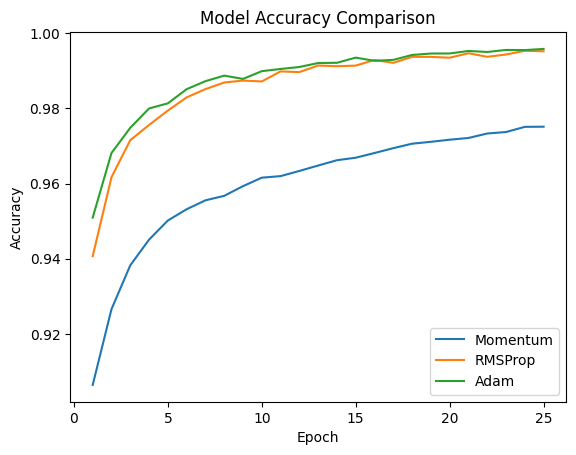

In [30]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(histories, labels):
  for history, label in zip(histories, labels):
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], label=label)

  plt.title('Model Accuracy Comparison')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

histories = [history_5, history_6, history_7]
labels = ['Momentum', 'RMSProp', 'Adam']
plot_accuracy_comparison(histories, labels)